In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/training_set_VU_DM.csv')

In [4]:
#convert datetime 
df['date_time'] = pd.to_datetime(df['date_time'])

#to year
df['year'] = df['date_time'].dt.year

#to month
df['month'] = df['date_time'].dt.month

#to day of the week
df['day_of_week'] = df['date_time'].dt.dayofweek

#to hour
df['hour'] = df['date_time'].dt.hour

df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day_of_week,hour
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,0.0,0.0,NaN,0,NaN,0,2013,4,3,8
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,0.0,0.0,NaN,0,NaN,0,2013,4,3,8
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,0.0,0.0,NaN,0,NaN,0,2013,4,3,8
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,-1.0,0.0,5.0,0,NaN,0,2013,4,3,8
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,0.0,0.0,NaN,0,NaN,0,2013,4,3,8


In [5]:
#make column with Boolean value for whether it was a weekend day
df['weekend'] = np.where(df['day_of_week'] < 5, 0, 1)

In [6]:
#make column with Boolean value for whether the country of the hotel is different from the origin country of the user
df['is_international_stay'] = np.where(df['visitor_location_country_id'] == df['prop_country_id'], 0, 1)

In [7]:
#make column with Boolean value for whether the srch_length_of_stay is 1 and booking_bool is True
df['price_per_night'] = np.where((df['srch_length_of_stay'] == 1) & (df['booking_bool'] == 1), df['price_usd'], "NaN")

In [8]:
#make column with Boolean value for when children are sought for in the search and a hotel was present in the search result
#df['children_accepted'] = np.where((df['srch_children_count'] > 0) & (df['prop_id'] > 0), 1, 0)

In [9]:
#make list of hotels in search result when children are sought for in the search
children_hotels = df[df['srch_children_count'] > 0]['prop_id'].unique()

#make column with children_accepted when prop_id is in the children_hotels list
df['children_accepted'] = np.where(df['prop_id'].isin(children_hotels), 1, 0)

In [10]:
#are there prop_id that are not in the children_hotels list but do exist in the dataset?
df[~df['prop_id'].isin(children_hotels)]['prop_id'].unique()

#how many prop_id are not in the children_hotels list but do exist in the dataset?
len(df[~df['prop_id'].isin(children_hotels)]['prop_id'].unique())

33121

In [11]:
#make column with mean date of stay
df['mean_date_stay'] = df['date_time'] + pd.to_timedelta(df['srch_booking_window'], unit='d') + (pd.to_timedelta(df['srch_length_of_stay'], unit='d')/2)
#skip hours and minutes
df['mean_day_stay'] = df['mean_date_stay'].dt.dayofyear

df.head()
#df['mean_date_stay'] = df['mean_date_stay'].dt.date

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,year,month,day_of_week,hour,weekend,is_international_stay,price_per_night,children_accepted,mean_date_stay,mean_day_stay
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,2013,4,3,8,0,1,NaN,1,2013-04-04 20:32:15,94
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,2013,4,3,8,0,1,NaN,1,2013-04-04 20:32:15,94
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,2013,4,3,8,0,1,NaN,1,2013-04-04 20:32:15,94
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,2013,4,3,8,0,1,NaN,1,2013-04-04 20:32:15,94
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,2013,4,3,8,0,1,NaN,1,2013-04-04 20:32:15,94


In [12]:
#convert mean_date to number of day in year
#df['mean_date_stay'] = pd.to_datetime(df['mean_date_stay'])


In [13]:
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

#make column with season
df['season_stay'] = np.where(df['mean_day_stay'].isin(spring), 'spring', np.where(df['mean_day_stay'].isin(summer), 'summer', np.where(df['mean_day_stay'].isin(fall), 'fall', 'winter')))

<AxesSubplot:xlabel='season_stay'>

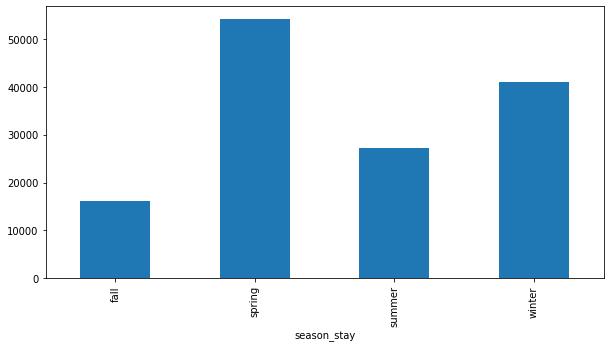

In [14]:
#plot histogram of seasons against booking_bool
df.groupby('season_stay')['booking_bool'].sum().plot(kind='bar', figsize=(10,5))

In [15]:
#are there hotels never booked in a certain season?
df[df['booking_bool'] == 1].groupby('season_stay')['prop_id'].nunique()


season_stay
fall      11274
spring    26516
summer    16418
winter    21180
Name: prop_id, dtype: int64

So most hotels are booked for spring, then winter, then summer, then fall.